In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [37]:
kepler = pd.read_csv('../datasets/kepler_processed.csv')
kepler.head()

,disposition,pre_disposition,period,impact,duration,depth,planet_radius,planet_temp,insolation_flux,model_snr,star_temp,star_grav,star_radius,right_ascension,declination,kepmag
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


# Disposition of detections

We have two columns of disposition for the KOIs (Kepler Objects of Interest):
* pre_disposition: preliminary status of the KOI, CANDIDATE or a FALSE POSITIVE
* disposition: status of the KOI, FALSE POSITIVE, CANDIDATE or CONFIRMED exoplanet

### Plotting dispositions

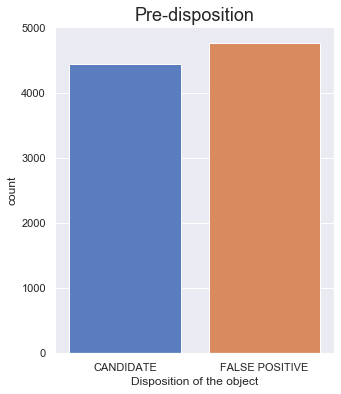

In [46]:
# Preliminary disposition
plt.figure(figsize=(5,6))
ax = sns.countplot(x="pre_disposition", palette="muted",  data=kepler)
plt.title(label='Pre-disposition', fontsize=18)
plt.xlabel('Disposition of the object');

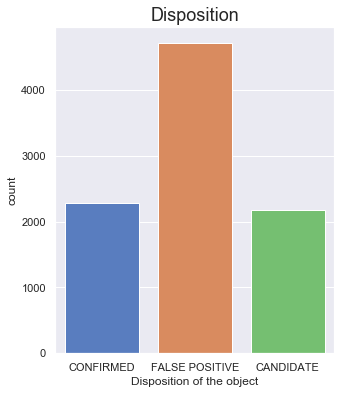

In [48]:
# Final disposition
plt.figure(figsize=(5,6))
ax = sns.countplot(x="disposition", palette="muted",  data=kepler)
plt.title(label='Disposition', fontsize=18)
plt.xlabel('Disposition of the object');

In [49]:
# Percentages
total = len(kepler)
p_candidates = 4496
p_false = 5068
candidate = 2248
confirmed = 2293
false = 5023

print('\n')
print('Preliminary disposition:')
tot_false = round((p_false/total)*100, 2)
print(tot_false, '% of KOIs are FALSE POSITIVES')

candidates = round((4496/total)*100, 2)
print(candidates, '% of KOIs are CANDIDATES')
print('\n')

print('Final disposition:')
tot_confirmed = round((confirmed/total)*100, 2)
tot_candidate = round((candidate/total)*100, 2)
tot_false = round((false/total)*100, 2)

print(tot_false, '% of KOIs are FALSE POSITIVES')
print(tot_candidate, ' % of KOIs are CANDIDATES')
print(tot_confirmed, '% of KOIs are CONFIRMED exoplanets')

print('\n')
print('Transition of disposition:')
# How many times each possible combination occurred)
transitions = pd.DataFrame((kepler.pre_disposition + ' - ' + kepler.disposition).value_counts(), columns=['Count'])
transitions = transitions.reindex(['FALSE POSITIVE - FALSE POSITIVE', 'CANDIDATE - CANDIDATE', 'CANDIDATE - CONFIRMED', 'FALSE POSITIVE - CONFIRMED'])
transitions



Preliminary disposition:
55.09 % of KOIs are FALSE POSITIVES
48.87 % of KOIs are CANDIDATES


Final disposition:
54.6 % of KOIs are FALSE POSITIVES
24.43  % of KOIs are CANDIDATES
24.92 % of KOIs are CONFIRMED exoplanets


Transition of disposition:


,Count
FALSE POSITIVE - FALSE POSITIVE,4723
CANDIDATE - CANDIDATE,2185
CANDIDATE - CONFIRMED,2248
FALSE POSITIVE - CONFIRMED,44


### Plotting celestial coordinates

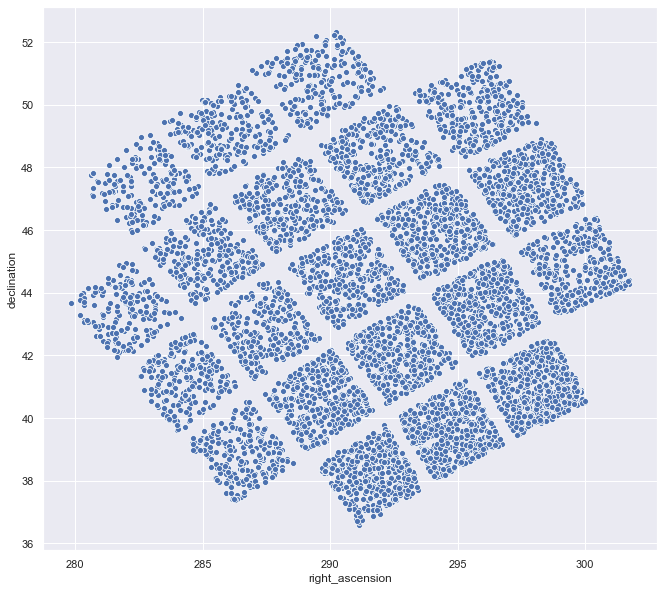

In [35]:
# Plotting coordinates of all CONFIRMED KOIs to map the part of the sky that Kepler went through.
plt.figure(figsize=(11,10))
sns.scatterplot(x='right_ascension', y='declination', data=kepler);